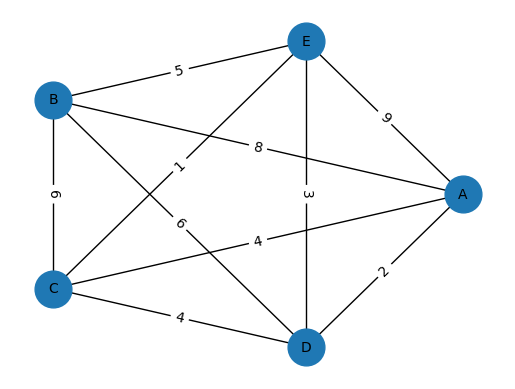

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edges_from([('A', 'E', {'weight': 9}), ('A', 'B', {'weight': 8}),
                  ('A', 'C', {'weight': 4}), ('A', 'D', {'weight': 2}),
                  ('B', 'E', {'weight': 5}), ('B', 'C', {'weight': 6}),
                  ('B', 'D', {'weight': 6}), ('C', 'D', {'weight': 4}),
                  ('C', 'E', {'weight': 1}), ('D', 'E',  {'weight': 3})])

# Get edge weights and labels
edge_labels = nx.get_edge_attributes(G, 'weight')

# Create a spring layout for positions
pos = nx.circular_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=1)

nx.draw_networkx_labels(G, pos, font_size=10, 
 font_family='sans-serif')

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()    

In [2]:
nx.dijkstra_path(G= G, source='A', target='E')

['A', 'D', 'E']

In [3]:
nx.dijkstra_path_length(G= G, source='A', target='E')

5

![alt](dijstra.jpg)

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
def dijkstra_path(G: nx.Graph,source,target):
    # pre: pesos un diccionario donde las claves son las aristas y los valores son reales no negativos. 
    # post: devuelve mst un MST de G. 
    def adyacentes(G:nx.Graph,u):
        adj={}
        for v , neightbors in G.adjacency():
            if v == u:
               adj = neightbors
               break     
        return adj       
    #mst = nx.Graph()
    #odernar los vertices por peso
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    clave, padre , visitado = {}, {},{} # dos diccionarios vacíos. El primero es una "cola de prioridad". El segundo indicará quien será el padre en el MST.
    maxV = max(edges,key=lambda x: x[2]['weight'])
    # INFINITO es un valor más alto que todos los pesos
    INFINITO = maxV[2]['weight']* 2 
    for u  in G.nodes:
        clave[u] = INFINITO 
        padre[u] = None
        visitado[u]=False   
        #padre[u] = None # Cuando el algoritmo termina padre[v] será el padre de v en el MST, para los v que no son raíz (el vértice r). 
    clave[source]=0
 
    cola=[]
    pathList=[]
    heapq.heappush(cola,(0,source))
    while len(cola) > 0:
        (cost, u) = heapq.heappop(cola)
        if visitado[u] :
            continue
        visitado[u]=True
        pathList.append((cost,u))
        if target == u :
            break
        adj =adyacentes(G,u)
        for v in adj:
            data = adj[v]
            temp1 = cost + data['weight'] 
            if not visitado[v]  and temp1 < clave[v]:
                padre[v] = u
                clave[v] = temp1
                heapq.heappush(cola,(temp1,v))
    
    return pathList

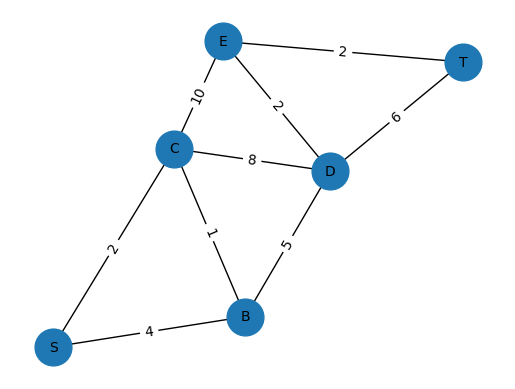

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G1 = nx.Graph()
G1.add_edges_from([('S', 'C', {'weight': 2}), ('D', 'E', {'weight': 2}),
                  ('S', 'B', {'weight': 4}), ('D', 'T', {'weight': 6}),
                  ('B', 'C', {'weight': 1}), ('E', 'T', {'weight': 2}),
                  ('B', 'D', {'weight': 5}), ('C', 'E', {'weight': 10}), 
                  ('C', 'D', {'weight': 8})])

# Get edge weights and labels
edge_labels = nx.get_edge_attributes(G1, 'weight')

# Create a spring layout for positions
pos = nx.spring_layout(G1)

# Draw nodes and edges
nx.draw_networkx_nodes(G1, pos, node_size=700)
nx.draw_networkx_edges(G1, pos, width=1)

nx.draw_networkx_labels(G1, pos, font_size=10, 
 font_family='sans-serif')

# Draw edge labels
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()    

In [19]:
path =dijkstra_path(G1,'S','T')
print(path)

[(0, 'S'), (2, 'C'), (3, 'B'), (8, 'D')]


In [20]:
nx.dijkstra_path(G1,'S','T')

['S', 'C', 'B', 'D']

In [21]:
nx.dijkstra_path_length(G1,'S','T')

8